<a href="https://colab.research.google.com/github/hiydavid/time_series_forecasting/blob/main/time_series_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Generation

In this notebook I will demonstrate functions that generate artificial time series.

In [29]:
# load basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

## Generate Time Series with Sine Waves

In [73]:
# function to generate multiple univariate time series with sine waves

'''
This function creates multiple time series, each the sum of two sine waves of 
fixed amplitudes, but randome frequencies and phgases, plus a bit of noise. 
This function is taken from page 504 of Hands-On Machine Learning with Scikit-
Learn, Keras, and TensorFlow. 

Arguments:
    > batch_size : number of different time series
    > n_steps    : length of each time seris 

Return:
    > NumPy array of shape batch_size x n_steps x 1
'''

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))   # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)     # noise
    return series[..., np.newaxis].astype(np.float32)

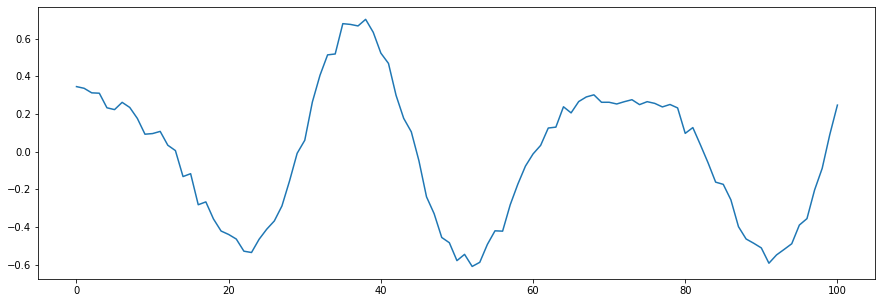

In [74]:
# generate time series
n_steps = 100
series = generate_time_series(1, n_steps + 1)

plt.figure(figsize = (15, 5))
plt.plot(pd.DataFrame(series[0]))
plt.show()

## Generate Time Series with Trend, Seasonality, Noise

In [92]:
# function to generate 1 time series with stated trend, seasonality, and noise

'''
This function creates one time series with specified trend value, seasonal
value, and random noise value.

Arguments:
    > slope           : a proxy for trend
    > pattern_steps   : a single time series pattern created using the
                        generate_time_series() function
    > pattern_repeats : number of times to repeat the pattern, which creates
                        a seasonal pattern
    > noise_size      : magnitude of white noise

Return:
    > NumPy array
'''

def generate_time_series_with_trend_seasonality(slope, 
                                                pattern_steps,
                                                pattern_repeats,
                                                noise_size
                                                ):
    
    # set steps
    freq, offsets = np.random.rand(2, 1)
    n_steps = pattern_steps * pattern_repeats

    # trend
    trend = np.arange(n_steps) * slope

    # seasonality
    pattern = pd.DataFrame(generate_time_series(1, pattern_steps)[0]) * 100
    seasonal = []
    seasonal.extend(itertools.repeat(pattern[0], pattern_repeats))
    seasonal = list(itertools.chain.from_iterable(seasonal))

    # white noise
    noise = np.random.randn(n_steps) * noise_size

    return trend + seasonal + noise

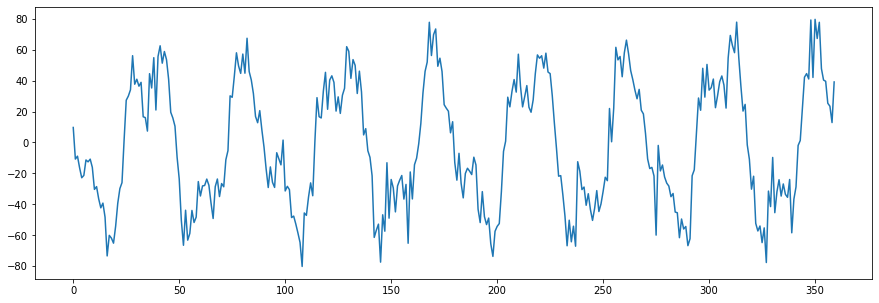

In [103]:
# generate time series
series = generate_time_series_with_trend_seasonality(slope = 0, 
                                                     pattern_steps = 90,
                                                     pattern_repeats = 4,
                                                     noise_size = 10
                                                     )

plt.figure(figsize = (15, 5))
plt.plot(pd.DataFrame(series))
plt.show()